In [ ]:
# Ryan Skidmore
# ITP 259 Fall 2023
# Final Project

import tensorflow as tf
import seaborn as sb
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder

# Problem 1
font_path = "SimHei.ttf"
# chinese_font = FontProperties(fname=font_path)
data = pd.read_csv("chineseMNIST.csv")
# Problem 2
plt.figure(1)
sb.countplot(data=data, x="label")
plt.xticks(rotation=45)
plt.show()
# Problem 3
plt.figure(figsize=[10, 10])
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    random_select = np.random.randint(0, len(data))
    image = data.iloc[random_select, :4096].values.astype(float)
    plt.imshow(image.reshape(64, 64), cmap="gray")
    plt.title(data.loc[random_select, "character"])#, fontproperties=chinese_font)
    plt.xlabel(data.loc[random_select, "label"])
    plt.tight_layout()
plt.show()
# Problem 4
target_dict = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8:
    '8', 9: '9', 10: '10', 100: '11', 1000: '12',
               10000: '13', 100000000: '14'}
reverse_dict = {0: "零", 1: "一", 2: "二", 3: "三", 4: "四", 5: "五", 6: "六", 7: "七", 8: "八", 9: "九", 10: "十",
                11: "百", 12: "千",
                13: "万", 14: "亿"}
data = data.replace({"label": target_dict})
print(data["label"])

target = data["label"].astype(int)
chinese_chars = data["character"]
features = data.drop(["label", "character"], axis=1)

# Problem 5
x_train, x_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.3, random_state=2023, stratify=target)
x_train_images = x_train.values.reshape(-1, 64, 64, 1) / 255
x_test_images = x_test.values.reshape(-1, 64, 64, 1) / 255
print(x_train_images.shape)
print(y_train.shape)
print(x_test_images.shape)
print(y_test.shape)

# Problem 6
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=9, padding="same", activation="relu", input_shape=(64, 64, 1)))
model.add(MaxPool2D())
model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu", input_shape=(64, 64, 1)))
model.add(MaxPool2D())
model.add(Conv2D(filters=32, kernel_size=5, padding="same", activation="relu", input_shape=(64, 64, 1)))
model.add(MaxPool2D())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(units=256, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(units=15, activation="softmax"))
# Problem 7
model.summary()
# Problem 8
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
# Problem 9
early_stopping = EarlyStopping(monitor="accuracy", patience=2, verbose= True, mode = "auto")
h = model.fit(x_train_images, y_train, epochs=10, validation_data=(x_test_images, y_test), callbacks=[early_stopping],
              batch_size=64, verbose=True)
# Problem 10
pd.DataFrame(h.history).plot()
plt.show()
# Problem 11
y_pred = model.predict(x_test_images)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)
plt.figure(figsize=[10, 10])
for i in range(30):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test_images[i], cmap="gray")
    plt.title("True:" + str(reverse_dict[y_test.iloc[i]]) + "\nPredict:" + str(reverse_dict[y_pred[i]]),
              fontproperties=chinese_font)
    plt.tight_layout()
plt.show()
# Problem 12
failed_indices = []
idx = 0

for i in y_test:
    if i != y_pred[idx]:
        failed_indices.append(idx)
    idx = idx + 1

plt.figure(figsize=[10, 10])
for i in range(30):
    plt.subplot(6, 6, i + 1)
    random_select = np.random.randint(0, len(failed_indices))
    failed_index = failed_indices[random_select]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test_images[failed_index], cmap="gray")
    pred_failed = reverse_dict[y_pred[failed_index]]
    actual_failed = reverse_dict[y_test.iloc[failed_index]]
    plt.title("Predicted:" + str(pred_failed) + "\nActual:" + str(actual_failed), fontproperties=chinese_font)
    plt.tight_layout()
plt.show()

KeyboardInterrupt: ignored

(50000, 12)
(50000, 12)
(50000, 12, 1)
(50000, 12, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 12, 2)             30        
                                                                 
 dropout_1 (Dropout)         (None, 12, 2)             0         
                                                                 
 dense_1 (Dense)             (None, 12, 12960)         38880     
                                                                 
Total params: 38910 (151.99 KB)
Trainable params: 38910 (151.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
267/267 [==============================] - 203s 754ms/step - loss: 8.9539 - accuracy: 0.6226 - val_loss: 8.2043 - val_accuracy: 0.5812


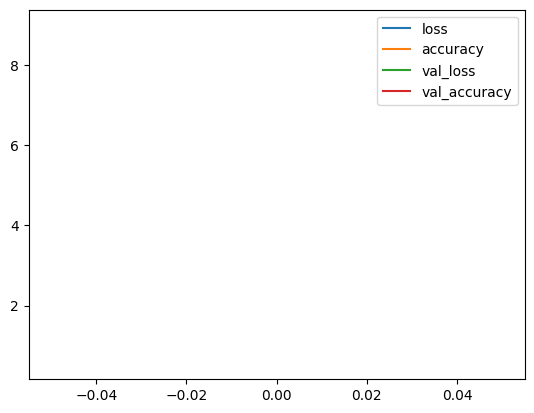

KeyboardInterrupt: ignored

In [ ]:
 # Ryan Skidmore
# ITP 259 Fall 2023
# Final Project Part 2

import tensorflow
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, GRU, Dropout
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

# Problem 1:
data = pd.read_csv("english-spanish-dataset.csv")
eng = data["english"][:50000]
span = data["spanish"][:50000]
# Problem 2:
# Problem 3:
# English Tokenier
eng_t = Tokenizer()
eng_t.fit_on_texts(eng)
eng_sequences = eng_t.texts_to_sequences(eng)

# Spanish Tokenizer
span_t = Tokenizer()
span_t.fit_on_texts(span)
span_sequences = span_t.texts_to_sequences(span)

# Problem 4:
# English Sequence Padding
eng_pad = pad_sequences(eng_sequences, maxlen=12, padding="post")
# Spanish Sequence Padding
span_pad = pad_sequences(span_sequences, maxlen=12, padding="post")

print(eng_pad.shape)
print(span_pad.shape)

# Reshape Pads for GRU layer compatibility:
eng_pad = eng_pad.reshape(*eng_pad.shape, 1)
span_pad = span_pad.reshape(*span_pad.shape, 1)

print(eng_pad)
print(span_pad.shape)

# Problem 5:
print(eng_pad.shape[1], eng_pad.shape[2])
print(eng_pad.shape[1:])
model = Sequential()
# model.add(GRU(64, input_shape=(eng_pad.shape[1], eng_pad.shape[2])))
model.add(GRU(128, input_shape=eng_pad.shape[1:], return_sequences=True))
model.add(Dropout(0.25))
model.add(GRU(64, input_shape=eng_pad.shape[1:], return_sequences=True))
model.add(Dropout(0.3))
model.add(Dense(units=len(span_t.word_index) + 1, activation="softmax"))

model.summary()

# Problem 6:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
early_stopping = EarlyStopping(monitor='loss', patience=2, restore_best_weights=True)

# Problem 7:
h = model.fit(eng_pad, span_pad, batch_size=150, epochs=10, validation_split=0.2, callbacks=early_stopping)

# Problem 8:GG
pd.DataFrame(h.history).plot()
plt.show()

# Problem 9
user_input = input("Please enter a sentence to be translated to Spanish: ")
user_input = [eng_t.word_index[word] for word in user_input.split()]
print(user_input)
# Tokenize the User input Data based on the tokenized English phrases:
# user_sequences = eng_t.texts_to_sequences([user_input])

# Pad the User input Data:
user_pad = pad_sequences([user_input], maxlen=12, padding="post")
# Reshape the input:
new_user_pad = []
for item in user_pad:
    for thing in item:
        new_user_pad.append([thing])

# Predict on the padded input:
print(new_user_pad)
user_pad.reshape(-1, 1)
print(user_pad)
pred = model.predict(user_pad)
print(pred.shape)
print(len(pred[0][0]))


# Problem 10
# Change the predicted softmax output back into Spanish:
def logits_to_text(logits, tokenizer):
    index_to_words = {id: word for word, id in tokenizer.word_index.items()}
    index_to_words[0] = "<PAD>"
    return ' '.join([index_to_words[prediction] for prediction in np.argmax(logits, 1)])


print(logits_to_text(pred[0], span_t))